In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [319]:
filename = ("../Downloads/ToyotaCorolla.csv")
data = pd.read_csv(filename)

In [320]:
data.tail()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015
1435,6950,76,1,Petrol,110,0,0,1600,5,1114


**There are 3 types of fuel category. We need to convert them to numerical values.**

__We can convert the categorical FuelType to 2 numeric vars: Fuel1 and Fuel2.__
- We assign CNG to Fuel1 : 1 represents it is a CNG vehicle and 0 it is not. 
- We assign Diesel to Fuel2 : 1 represents it is a Diesel vehicle and 0 it is not.
- Petrol is represented by the case when BOTH Fuel1 and Fuel2 are zero.

In [130]:
data['FuelType'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: FuelType, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [321]:
from sklearn.preprocessing import LabelBinarizer

lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(data["FuelType"])
newcol = pd.DataFrame(lb_results, columns=lb_style.classes_)

In [322]:
fet = pd.concat([data,newcol],axis=1)
fet.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,0,1,0


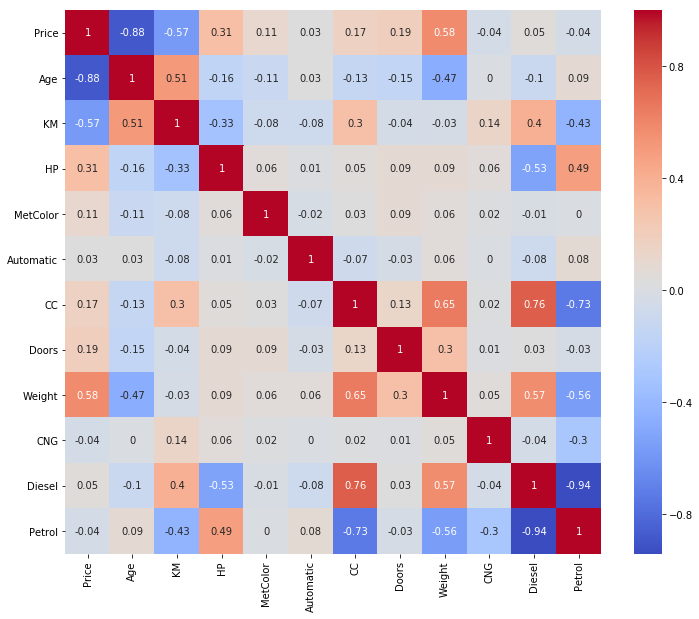

In [323]:
data = fet
plt.figure(figsize=(12,10))
sns.heatmap(data.corr().round(2),cmap='coolwarm',annot=True)

In [135]:
data.corr(method='pearson')

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.165067,0.185326,0.581198,-0.039536,0.054084,-0.038516
Age,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.133182,-0.148359,-0.470253,0.002389,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.302150,-0.036197,-0.028598,0.144016,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.050884,0.092424,0.089614,0.062109,-0.533453,0.489110
MetColor,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.034921,0.085243,0.057929,0.021009,-0.012420,0.004872
Automatic,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,-0.069321,-0.027654,0.057249,0.001486,-0.084490,0.080249
CC,0.165067,-0.133182,0.302150,0.050884,0.034921,-0.069321,1.000000,0.126768,0.651450,0.019335,0.761667,-0.734334
Doors,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.126768,1.000000,0.302618,0.009680,0.025495,-0.027589
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057929,0.057249,0.651450,0.302618,1.000000,0.052756,0.568087,-0.560470
CNG,-0.039536,0.002389,0.144016,0.062109,0.021009,0.001486,0.019335,0.009680,0.052756,1.000000,-0.038074,-0.296717


**Exploratory Data Analysis (EDA):**

We plot some of the variables against the price, to see the underlying correlation.


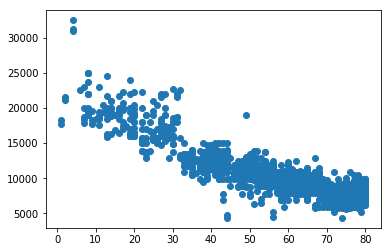

In [149]:
plt.scatter(data['Age'],data['Price'])

The plot of Age against price -  indicates that new cars are more expensive.

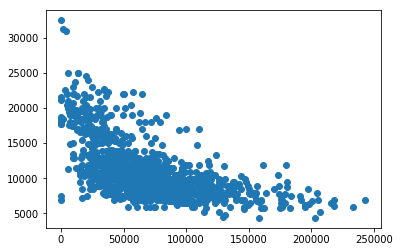

In [151]:
plt.scatter(data['KM'],data['Price'])

The plot of Kilometers against price : the more car has run, the less expensive it is.

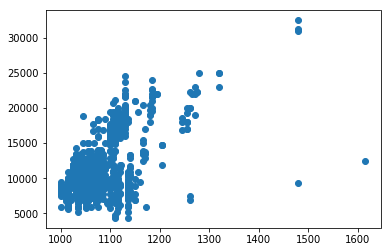

In [155]:
plt.scatter(data['Weight'],data['Price'])

Plotting weight of car against price : though heavier cars are more expensive, it is not always the case, there are some oultiers.

In [324]:
prices = data['Price']
data = data.drop(['FuelType'], axis=1)
#data = data.drop(['bedrooms','sqft_lot','floors','view','waterfront','condition','zipcode','sqft_lot15'], axis = 1)
features = data.drop('Price', axis = 1)
data.head()
#features.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0


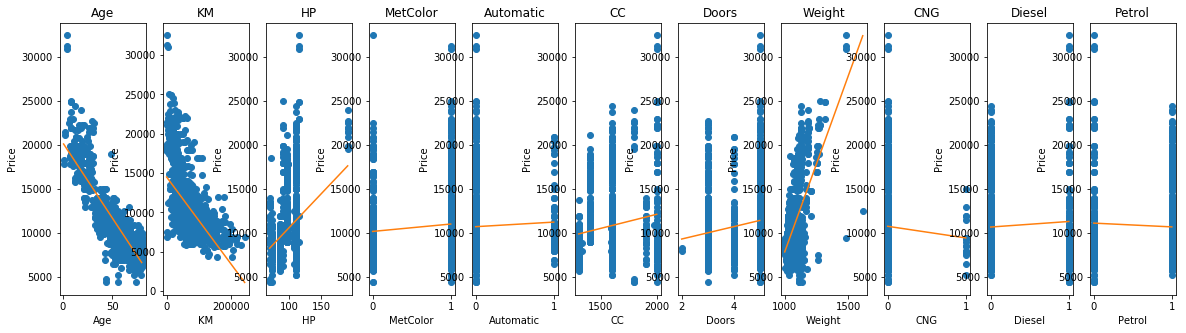

In [325]:
import matplotlib.pyplot as plt
import numpy
plt.figure(figsize=(20, 5))
# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 11, i+1)
    x = features[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(numpy.unique(x), numpy.poly1d(numpy.polyfit(x, y, 1))(numpy.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')

In [326]:
from sklearn.metrics import accuracy_score
array = features.values
X = array[:,:]
Y = prices
test_size = 0.33
seed = 10
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
#model = LogisticRegression(penalty='l2')
model.fit(X_train, Y_train)
#ypred_train = model.predict(X_train)
#ypred_test = model.predict(X_test)
#accuracy_score(Y_train,ypred_train)
#accuracy_score(Y_test,ypred_test)

result = model.score(X_test, Y_test)
finalResult = result*100
print("The Accuracy Score  : {}". format(finalResult))

The Accuracy Score  : 86.5467773015


In [327]:
pca = PCA(n_components=5)  
X_train = pca.fit(X_train)  
X_test = pca.transform(X_test)  
#X_train = pca.transform(X_train)  

In [332]:
X_test

array([[-2.59821246e+04,  5.85419436e+01, -4.09896803e+01,
         8.24739545e+00,  1.08436085e+01],
       [-1.62843881e+04, -1.53843857e+02, -1.66907125e+01,
        -6.09798628e+00, -1.20487592e+00],
       [ 8.60512876e+04,  3.26730905e+02, -1.19819386e+01,
        -2.56380393e+01, -1.24094984e+00],
       ...,
       [ 1.29308424e+04,  1.08495560e+01, -2.61165065e+01,
         1.11778985e+01,  2.35415607e+00],
       [-2.73214642e+03,  3.02967446e+01, -3.05559494e+01,
         6.87031773e+00, -1.63850150e+00],
       [ 6.26784448e+03,  2.34218268e+01, -8.01951646e+00,
         9.38971452e+00,  3.46384946e-01]])

In [329]:
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
#model = LogisticRegression(penalty='l2')
model.fit(X_train, Y_train)
#ypred_train = model.predict(X_train)
#ypred_test = model.predict(X_test)
#accuracy_score(Y_train,ypred_train)
#accuracy_score(Y_test,ypred_test)

result = model.score(X_test, Y_test)
finalResult = result*100
print("The Accuracy Score  : {}". format(finalResult))

AttributeError: 'Series' object has no attribute 'reshape'

In [294]:
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
model.fit(X_train, Y_train)
#y_pred = model.predict(X_test)
result = model.score(X_test, Y_test)
result
#finalResult = result*100
#print("The Accuracy Score  : {}". format(finalResult))

#from sklearn.metrics import accuracy_score

#print(accuracy_score(Y_test, y_pred))  

0.2727622144156442